In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Parse the data file to obtain the raw data

In [3]:
path = '/Users/ziegler/p8/psu_data/vna_data/two_horn_1GHz_'
files=['4.csv','6.csv','8.csv']

raw_data={'4':{},'6':{},'8':{}}
#raw_data={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
for i,k in enumerate(raw_data):
    raw_data[k].update({'f':[],'s42':{'mag':[],'phi':[]}})
    with open(path+files[i]) as infile:
        read=csv.reader(infile,delimiter=',')
        for row in read:
            #print(row)
            try:
                if len(row)>0:
                    raw_data[k]['f'].append(float(row[0]))
                    raw_data[k]['s42']['mag'].append(float(row[5]))
                    raw_data[k]['s42']['phi'].append(float(row[6]))
                    #raw_data[k]['s31']['mag'].append(float(row[17]))
                    #raw_data[k]['s31']['phi'].append(float(row[18]))
                    #raw_data[k]['s41']['mag'].append(float(row[25]))
                    #raw_data[k]['s41']['phi'].append(float(row[26]))
            except ValueError:
                continue

# Plot of the unwrapped phases of S21, S31, and S41

Text(0.5, 1.0, '1 GHz BW')

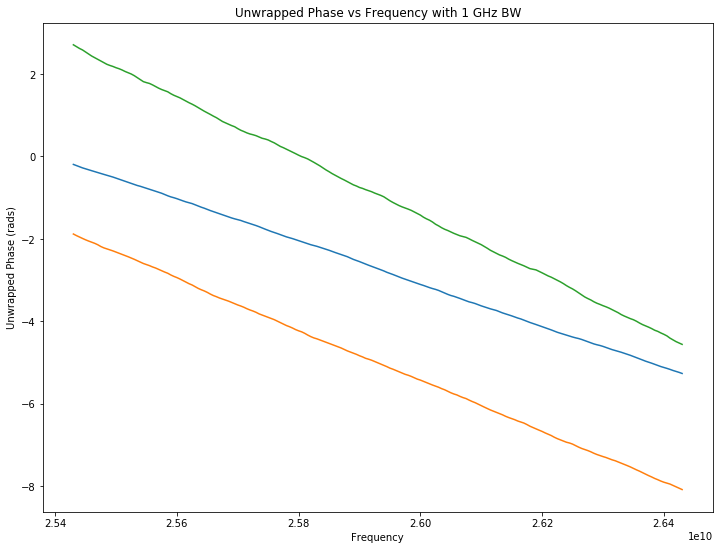

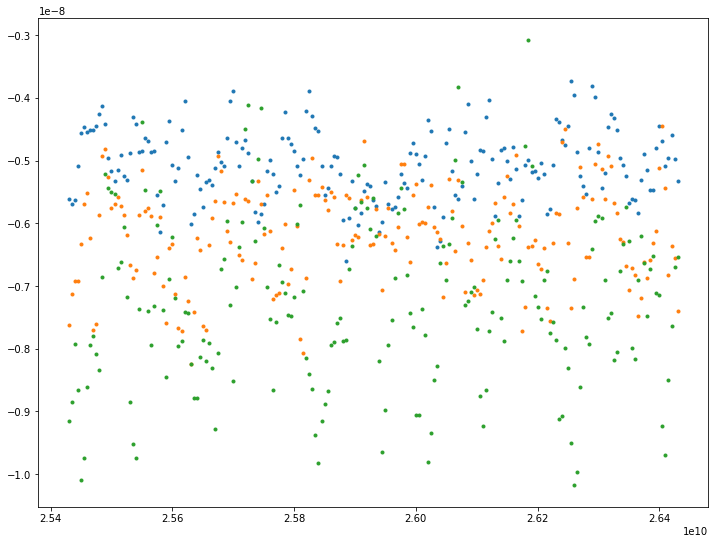

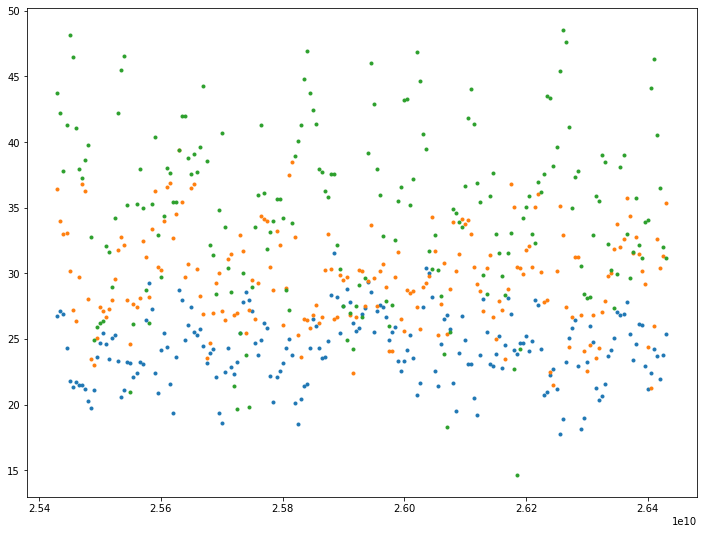

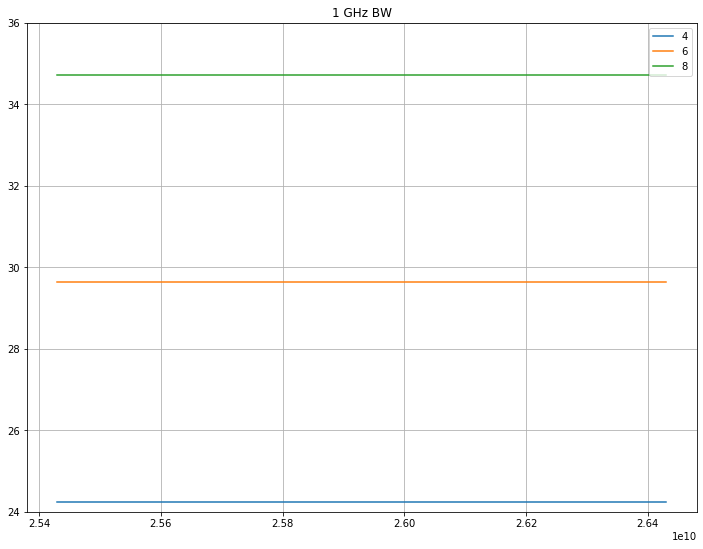

In [14]:
plt.figure(figsize=(12,9))
for i,k in enumerate(raw_data):
    plt.plot(raw_data[k]['f'],np.unwrap(np.radians(raw_data[k]['s42']['phi'])))
#plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s31']['phi'])))
#plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s41']['phi'])))
plt.title('Unwrapped Phase vs Frequency with 1 GHz BW')
plt.xlabel('Frequency')
plt.ylabel('Unwrapped Phase (rads)')
plt.figure(figsize=(12,9))
for i,k in enumerate(raw_data):
    plt.plot(raw_data[k]['f'],np.gradient(np.unwrap(np.radians(raw_data[k]['s42']['phi'])),raw_data[k]['f']),'.')
#plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f']),'.')
#plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f']),'.')

#r2=-np.gradient(np.unwrap(np.radians(raw_data['s21']['phi'])),raw_data['f'])*3e10/(2*np.pi) # in cm
#r3=-np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f'])*3e10/(2*np.pi)
#r4=-np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f'])*3e10/(2*np.pi)

avg_dist=[]
plt.figure(figsize=(12,9))
for i,k in enumerate(raw_data):
    r=-np.gradient(np.unwrap(np.radians(raw_data[k]['s42']['phi'])),raw_data[k]['f'])*3e10/(2*np.pi) # in cm
    plt.plot(raw_data[k]['f'],r,'.')
    avg_dist.append(np.mean(r))
    
plt.figure(figsize=(12,9))
for i,k in enumerate(raw_data):
    plt.plot(raw_data[k]['f'],np.zeros(len(raw_data[k]['f']))+avg_dist[i],label=k)
    
#plt.plot(raw_data['f'],r3,'.')
#plt.plot(raw_data['f'],r4,'.')
#print(r2,r3,r4)
plt.legend()
plt.ylim(24,36)
plt.grid()
plt.title('1 GHz BW')

In [12]:
print(avg_dist[2]-avg_dist[1],avg_dist[1]-avg_dist[0])

5.082621807628524 5.407591376451073


Text(0, 0.5, 'reconstructed distance (cm)')

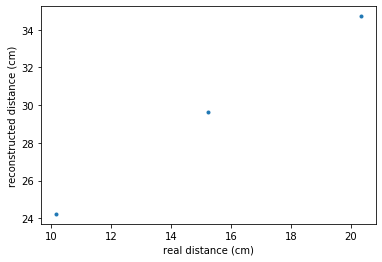

In [16]:
real_dist=2.54*np.array([4,6,8])
plt.plot(real_dist,avg_dist,'.')
plt.xlabel('real distance (cm)')
plt.ylabel('reconstructed distance (cm)')

181.63853855721393 196.71372097844113


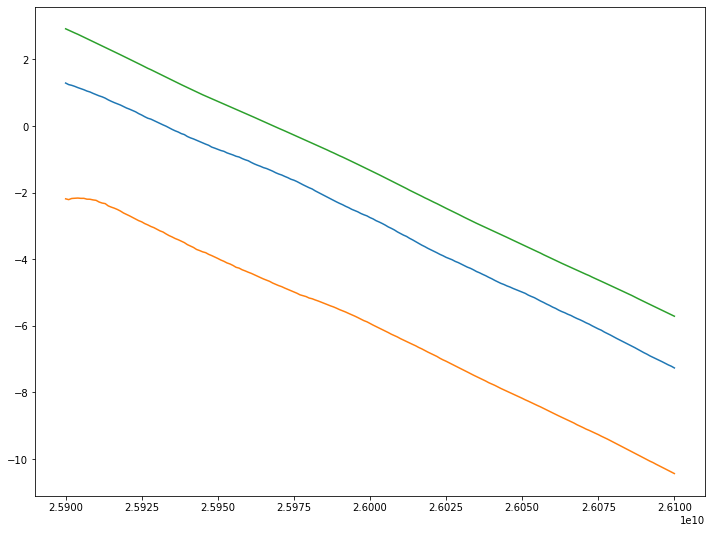

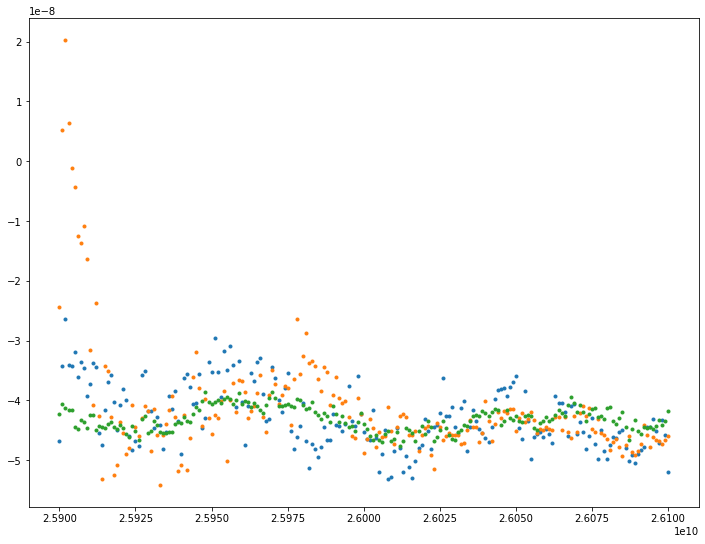

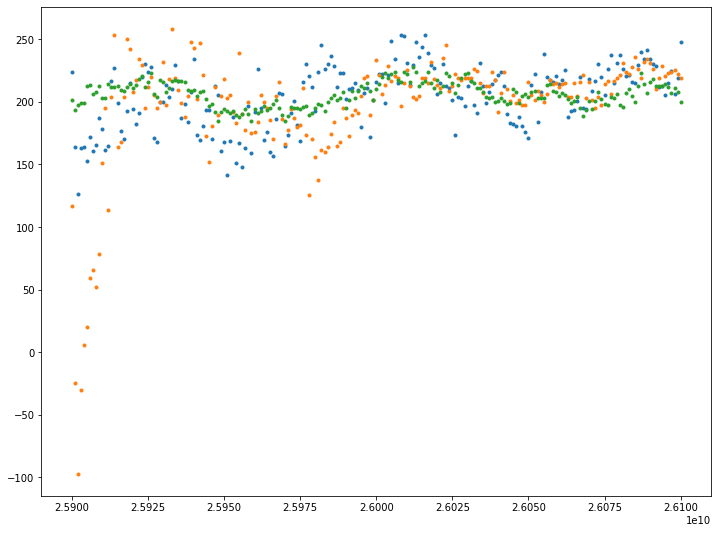

In [77]:
plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s21']['phi'])))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s31']['phi'])))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s21']['phi'])),raw_data1['f']),'.')
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s31']['phi'])),raw_data1['f']),'.')
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s41']['phi'])),raw_data1['f']),'.')

r2_1=-np.gradient(np.unwrap(np.radians(raw_data1['s21']['phi'])),raw_data1['f'])*3e10/(2*np.pi) # in cm
r3_1=-np.gradient(np.unwrap(np.radians(raw_data1['s31']['phi'])),raw_data1['f'])*3e10/(2*np.pi)
r4_1=-np.gradient(np.unwrap(np.radians(raw_data1['s41']['phi'])),raw_data1['f'])*3e10/(2*np.pi)

plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],r2_1,'.')
plt.plot(raw_data1['f'],r3_1,'.')
plt.plot(raw_data1['f'],r4_1,'.')
print(np.mean(r3),np.mean(r3_1))

# Zero pad frequencies before the starting frequency in the raw data

In [46]:
pad_data={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
for i,k in enumerate(raw_data):
    if i==0:
        pad_data['f']=np.append(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0]),raw_data['f'])
        print(k)
    else:
        for j,l in enumerate(raw_data[k]):
            print(k,l)
            pad_data[k][l]=np.append(np.zeros(len(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0])))
                                     ,raw_data[k][l])



f
s21 mag
s21 phi
s31 mag
s31 phi
s41 mag
s41 phi


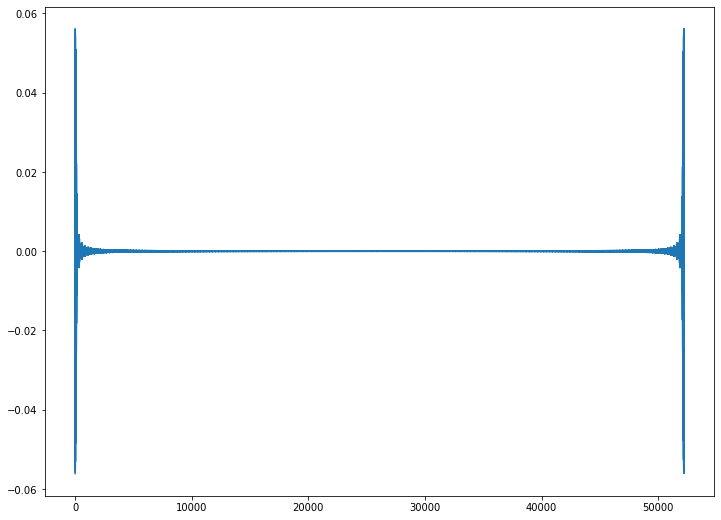

In [50]:
#plt.figure(figsize=(12,9))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s21']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s31']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(np.fft.irfft(np.unwrap(np.radians(pad_data['s21']['phi']))))

In [36]:
raw_data['f'][0]

25900000000.0